In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

import sklearn
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans 

pd.set_option('display.max_columns', 999)

In [4]:
print(sklearn.__version__)   # version 22

0.21.2


In [5]:
train_house = pd.read_csv('train.csv', index_col = 0)
train_house.head()
# train_house.shape

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# train_house['MSZoning'].value_counts()
train_house.shape

(1460, 80)

In [7]:
test_house = pd.read_csv('test.csv', index_col = 0)
train_house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
all_data = pd.concat([train_house.copy().drop(columns=['SalePrice']), test_house.copy()], axis=0)    # concatenates on the datasets index

In [9]:
# SalesPrice = pd.concat([train_house['SalePrice'], test_house.SalePrice], axis = 0)
# SalesPrice

In [10]:
     #write csv for imputation in R, a new python package for imputation/missingness not covered

In [11]:
all_data.to_csv('alldata.csv', index=False,header=True)

# finaldf.to_csv('output.csv', index=False, header=None)

In [12]:
categorical_feat = train_house.columns[train_house.dtypes=='object']
lst_count = categorical_feat.to_list()

In [13]:
numerical_feat = train_house.columns[(train_house.dtypes == 'int64') | (train_house.dtypes == 'float64')]
numerical_features = numerical_feat.to_list() 

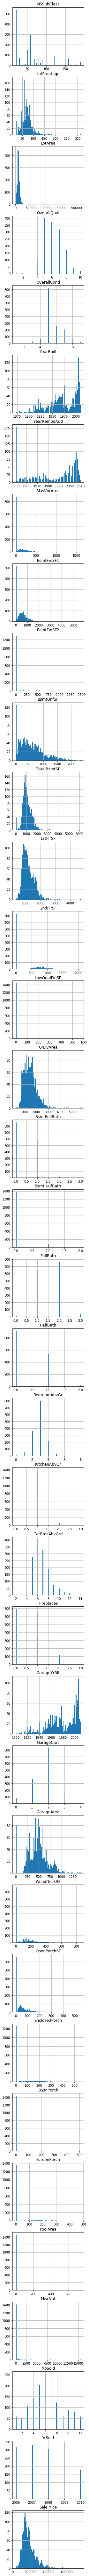

In [14]:
fig, axes = plt.subplots(37, 1, figsize=(4,37*4))

for i, current_feat in enumerate(numerical_features):           # for numerical features
    train_house[current_feat].hist(bins=80, ax = axes[i]) 
    axes[i].title.set_text(current_feat)   # titles 
    

In [15]:
# fig, (graph_0, graph_1, graph_2, graph_3) = plt.subplots(1, 4, figsize=(14, 4))
# import pylab as pl

# train_house['MSSubClass'].hist(bins=100, ax = graph_0)
# train_house['LotFrontage'].hist(bins=100, ax = graph_1)
# train_house['LotArea'].hist(bins=100, ax = graph_2)
# train_house['OverallQual'].hist(bins=100, ax = graph_3)
# pl.suptitle("This is Figure title")

# sns.distplot(train_house['SalePrice'], ax = graph_0)
# len(numerical_features)
# for i in range(0,1):
#     test_house[numerical_features[i]].hist(bins=100, ax = graph_0)
#     test_house[numerical_features[i]].hist(bins=100, ax = graph_1)
    
#     test_house['LotArea'].hist(bins=100, ax = graph_2)

#     test_house['LotArea'].hist(bins=100, ax = graph_2)


In [16]:
# test_house[numerical_features[1]].hist(bins=100)

In [17]:
def feat_list(feat_list):
    for i in range(0,len(feat_list)):
        print(train_house[lst_count[i]].value_counts())
        print('\n')
        

In [18]:
def feat_histograms(numerical_list):
    for i in range(0,len(numerical_list)):
        graph = 'graph_{}'.format(i)
        sns.distplot(train_house['SalePrice'], ax = graph)    

In [19]:
numerical_feat = train_house.columns[(train_house.dtypes == 'int64') | (train_house.dtypes == 'float64')]
numerical_feat = numerical_feat.drop('SalePrice')
numerical_features = numerical_feat.to_list() 

# feat_histograms(numerical_features)

In [20]:
#categorical features
categorical_feat = train_house.columns[train_house.dtypes=='object']
categorical_features = categorical_feat.to_list()
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
#numerical features
numerical_feat = train_house.columns[(train_house.dtypes == 'int64') | (train_house.dtypes == 'float64')]
numerical_features = numerical_feat.to_list() 
numerical_features = numerical_features[:-1]
numerical_features      

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [22]:
def feat_list(feat_list):
    for i in feat_list:
        print(train_house[i].value_counts())
        print('\n')

In [23]:
# def feat_list(feat_list):
#     for i in range(0,len(feat_list)):
#         print(train_house[lst_count[i]].value_counts())
#         print('\n')
        
# feat_list(numerical_features)

In [24]:
feat_list(categorical_features)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neig

In [25]:
all_data = pd.concat([train_house.copy().drop(columns=['SalePrice']), test_house.copy()], axis=0)    # concatenates on the datasets index
# all_data.columns
all_data.isnull().any().sum()

34

In [26]:
imputed_df = pd.read_csv('imputed_datafame_intergers.csv')
# imputed_df.head()

In [27]:
imputed_df.drop('Unnamed: 0', axis=1, inplace=True)

Imputation and missingness 

In [28]:
def missingness(df):
    missing_features = df.columns[df.isna().any()]
    missing_train = df.isnull()
    missing_train = missing_train.sum()
    missing_train = missing_train[missing_train>0].sort_values(ascending=False)
    return missing_train[missing_train>0]

# .plot(kind='bar')
# missingness(train_house)[:20].plot(kind ='bar')

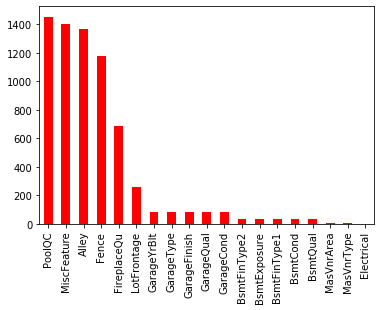

In [29]:
missingness(train_house)[:20].plot(kind='bar', color = 'r', sort_columns = False)

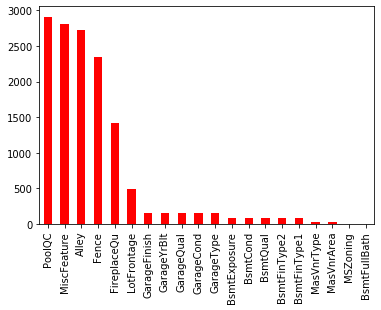

In [30]:
missingness(all_data)[:20].plot(kind='bar', color = 'r', sort_columns = False)

In [31]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [32]:
# df['PoolQC'].isna().count()

# drop_features = ['PoolArea', 'PoolQC', ]
# train_house.drop(pool_drop, axis=1, inplace=True)

NameError: name 'df' is not defined

In [33]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
# df[['MSZoning','MSSubClass']]

In [38]:
all_data.S

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [42]:
df = all_data.copy()
df.head()
def features_engineer(df): 
    drop = ['Id', 'Street', 'Utilities','PoolQC','EnclosedPorch', 'OpenPorchSF', 'ScreenPorch'
           'WoodDeckSF', '3SsnPorch','HalfBath','BsmtHalfBath','FullBath', 'BsmtFullBath']
    # df.drop(pool_drop, axis=1, inplace=True)
      #consolidating 
    df['TotalPorch'] = df['EnclosedPorch'] + df['OpenPorchSF'] + df['ScreenPorch'] + df['WoodDeckSF'] + df['3SsnPorch']
    df['TotalBath'] = (df['HalfBath']/2 + df['BsmtHalfBath']/2 + df['FullBath'] + df['BsmtFullBath']).astype('str')
      #NAs' 
    df[['MSZoning','MSSubClass']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))
    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['Utilities'] =df['Utilities'].fillna(df['Utilities'].mode()[0])
    df['Electrical'] = df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))
    df['LotFrontage'] = df[['Neighborhood', 'LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.mean()))
    df[numerical_features] = df[numerical_features].fillna(0)
    df[categorical_features] = df[categorical_features].fillna('None')
      #adding features
    df['withPool'] = df['PoolArea'].apply(lambda x: 'Yes' if x >0 else 'No')
    df['withFireplace'] = df['Fireplaces'].apply(lambda x: 'Yes' if x>0 else 'No')
    new_cols = list(set(df.columns).difference(drop))
    return df[new_cols]

In [43]:
all_data_cols = features_engineer(all_data)
all_data_cols.isna().any().sum()

0

In [45]:
train_housing = train_house.copy()

def df_extract_numeric_features(dataframe):
    # train_housing[(train_housing.dtypes == 'int64') | (train_housing.dtypes == 'float64')]
    int_columns = train_housing.select_dtypes(['int64'])
    float_columns = train_housing.select_dtypes(['float64'])
    df_numeric = pd.concat([int_columns, float_columns], axis = 1, sort = False)
    return df_numeric

In [46]:
df_numeric = df_extract_numeric_features(train_house)

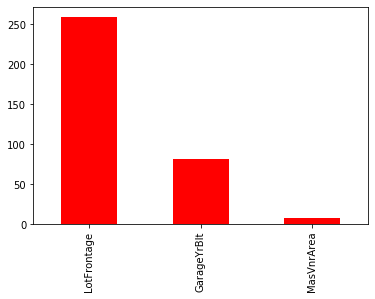

In [47]:
missingness(df_numeric)[:20].plot(kind='bar', color = 'r', sort_columns = False)

In [48]:
zero_pool = sum(df_numeric.PoolArea != 0)
# len(df_numeric.PoolArea)- zero_pool
zero_pool

7

In [49]:
drop = [('PoolQC', 'MiscFeature', 'Alley','Fense')]
all_data.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [ ]:
pool_drop = ['PoolArea', 'PoolQC']
train_house.drop(pool_drop, axis=1, inplace=True)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)


knn_model.fit(df_numeric, train_house['SalePrice'])


In [ ]:
norm.fit(train_house['SalePrice']) 

In [ ]:
train_housing = train_house.copy()

def df_extract_numeric_features(dataframe):
    # train_housing[(train_housing.dtypes == 'int64') | (train_housing.dtypes == 'float64')]
    int_columns = train_housing.select_dtypes(['int64'])
    float_columns = train_housing.select_dtypes(['float64'])
    df_numeric = pd.concat([int_columns, float_columns], axis = 1, sort = False)
    return df_numeric

In [ ]:
df_numeric = df_extract_numeric_features(train_house)

In [ ]:
def normalize_skew(data):
    data = df_numeric.copy()
    data = data.apply(lambda z: skew(z)).sort_values()
    return data
    
# skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)

In [ ]:
skews = normalize_skew(df_numeric)
skews[skews>.75]

In [ ]:
# skews[skews<-.75]

In [ ]:
fig, (graph_1, graph_2) = plt.subplots(1, 2, figsize=(14, 4))

# histogram with density plot
# mu = norm.fit(train_house['SalePrice']) 


sns.distplot(train_house['SalePrice'], ax = graph_1)
# graph_1.legend(['Normal dist. $\mu=$ {.2f}%'.format(mu)], loc = 'best')
# ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
graph_1.set_ylabel('Frequency')
graph_1.set_title('Sale Price Distrobution')

#
graph_2 = plt.subplot(122)
res = stats.probplot(train_house['SalePrice'], plot=plt)
plt.show()

In [ ]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train_house)

In [ ]:
# KMeans

In [ ]:
from sklearn.cluster import KMeans 
from PlottingFunctions import plot_inertia, plot_silhouette 
model_kmeans = KMeans()   

In [ ]:
plot_silhouette(model_kmeans, imputed_df)

In [ ]:
plot_inertia(model_kmeans, imputed_df, range(1,300)) 

In [ ]:
model_kmeans.set_params(n_clusters= 2, random_state = 0) 
model_kmeans.fit(imputed_df)
model_kmeans.cluster_centers_    # centriods for each cluster
model_kmeans.labels_

In [ ]:
plt.scatter(imputed_df['GarageArea'],imputed_df['SalePrice'], c = model_kmeans.labels_, alpha=0.8)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], marker='+', s=1000, color = 'RGB')

# plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, alpha=0.8)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=1000, c=[0, 1])
# plt.show()
# plot_silhouette(kmeans, card)

In [ ]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
corr = train_house.corr()
sns.heatmap(train_house[corr[corr['SalePrice'].abs()>0.5].index].corr(),annot=True,cmap="coolwarm")

# train_house[corr[corr['SalePrice'].abs()>0.5.index], annot=True,cmap="RdYlGn")
# print(corr[corr['SalePrice']].abs()>0.5.index.corr())

# plt.rcParams['figure.figsize']= [10.0, 10.0]
# corr=train.corr()
# sns.heatmap(train[corr[corr['SalePrice'].abs()>0.5].index].corr(),annot=True,cmap="RdYlGn")
# plt.savefig('heatmap.png',bbox_inches='tight')

In [ ]:
numerical_feat = train_house.columns[(train_house.dtypes == 'int64') | (train_house.dtypes == 'float64')]
numerical_features = numerical_feat.to_list() 

In [ ]:
train_housing = train_house.copy()

def df_extract_categorical_features(dataframe):
    category_df = train_housing.select_dtypes(['object'])
    df_category = category_df
    return df_category


# result = pd.concat([df1, df4], axis=1, sort=False)

In [ ]:
def df_extract_numeric_features(dataframe):
    # train_housing[(train_housing.dtypes == 'int64') | (train_housing.dtypes == 'float64')]
    int_columns = train_housing.select_dtypes(['int64'])
    float_columns = train_housing.select_dtypes(['float64'])
    df_numeric = pd.concat([int_columns, float_columns], axis = 1, sort = False)
    return df_numeric

In [ ]:
df_numeric = df_extract_numeric_features(train_housing)            #numeric dataframe from train csv
df_categorical = df_extract_categorical_features(train_housing)    #categorical dataframe from train csv


In [ ]:
df_numeric.describe()

In [ ]:
missingness(df_categorical)

In [ ]:
# train model
train_house_y = train_house['SalePrice']
train_house_X = train_house.iloc[:,0:79]

df_numeric = df_extract_numeric_features(train_housing)
df_numeric.isna().sum()
drop_numeric = df_numeric.dropna(axis=0, how='all')

# imputation 
drop_numeric.isna().sum()

# df_numeric['LotFrontage'].value_counts()
# df.dropna(axis=1, how='any')

In [ ]:
train_house_y = train_house['SalePrice']
all_data_cols.head()

In [ ]:
categorical_feats_engi = all_data_cols.columns[all_data_cols.dtypes=='object']
numerical_feats_engi = all_data_cols.columns[all_data_cols.dtypes!='object']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_labels_data = all_data_cols.copy()
for i in categorical_feats_engi:
    cat_labels_data[i] = le.fit_transform(cat_labels_data[i])
    
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data_label = all_data.copy()
# for i in categorical_feat:
#     data_label[i] = le.fit_transform(data_label[i])

In [ ]:
category_dummy = pd.get_dummies(all_data_cols[categorical_feats_engi])          # categical dummy(binary) data 
data_dummy = pd.concat([category_dummy,all_data[numerical_feats_engi]], axis=1)

In [ ]:
all['TotalPorch']

In [ ]:
X = data_dummy.head(train_house.shape[0])
X.shape

In [ ]:
train_house_y.shape

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,train_house_y, test_size = .2)  # 'X' parameter is the combined data 

In [ ]:
train_idx = X_train.index
test_idx = y_train.index

In [ ]:
train_x = X.loc[train_idx]
test_x = X.loc[test_idx]

In [ ]:
ridge = Ridge() 

In [ ]:
ridge.set_params(alpha = 0, normalize=True, random_state=108, tol=0.001)

In [ ]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  
coefs.head()

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('linear')
plt.axis('tight')
plt.title('Ridge coefficients for regularization')
# ax = plt.gca()
# ax.plot(alphas, coefs)

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)

for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=6)   
plt.xticks(ticks=np.arange(0,18,step = 2))
plt.axis('tight')
# plt.yticks(ticks=np.arange(-9e18,9e18,step=1000))         # y-axis ticks are not forming to the plt graph (matplotlib)
# plt.set(xlim=(-0.5, 10.0), ylim=(-4,5))
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title('Ridge coefficients for regularization')

# ax = plt.gca()
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# plt.axis('tight')
# plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees


# ax = plt.gca()

# ax.plot(alphas, coefs_lasso)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Lasso coefficients as a function of the regularization')
# plt.axis('tight')
# plt.show()

In [ ]:
alphas = 100**np.linspace(10,-2,1000)*0.5
grid_para = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

grid_search_ridge = ms.GridSearchCV(ridge, cv=10, param_grid=grid_para, n_jobs=-1, verbose=0)

In [ ]:
grid_search_ridge.fit(X_train,y_train)  

In [ ]:
grid_search_ridge.best_params_  

In [ ]:
print( grid_search_ridge.score(X_train, y_train))    # scores are not as good as the single train-test-split, why?
print( grid_search_ridge.score(X_test, y_test)) 

In [ ]:
y_train_grid = grid_search_ridge.predict(X_train)
y_test_grid = grid_search_ridge.predict(X_test)

In [ ]:
plt.scatter(y_train_grid, y_train, c='black', marker="o", s=15, label = "Training data")
plt.scatter(y_test_grid, y_test, c='orange', marker='o', s=15, label = "Validation data")
plt.legend(loc = "upper left")
plt.title('Ridge cross validation - Grid Search')

In [ ]:
print(X_test.shape, y_test_ridge.shape)

In [ ]:
y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)
plt.figure(figsize=(12,8))
plt.scatter(y_train_ridge, y_train, c='black', marker="o", s=15, label = "Training data")
plt.scatter(y_test_ridge, y_test, c='orange', marker='o', s=15, label = "Validation data")
# plt.plot([0, 500000], [0, 500000], c = "grey")
plt.legend(loc = "upper left")
plt.title('Ridge test-train-split')

plt.xlim(0, 500000)
plt.ylim(0, 500000)

In [ ]:
# sns.lmplot(x=y_train_ridge, y= y_train, data=y_train_ridge)

In [ ]:
print('Train test R^2 score: %.5f' %ridge.score(X_train, y_train))
# print('Test test R^2 score: %.5f' %ridge.score(X_test, y_test))

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(10,10))
# fig, axes = plt.subplots(37, 1, figsize=(4,37*4))
top_coefs = pd.Series(ridge.coef_, index=X_train.columns).sort_values(ascending=False)[:20]
top_coefs2 = pd.Series(ridge.coef_, index=X_train.columns).sort_values(ascending=False)[-20:]           #.tail(20)
top_coefs.plot(kind='barh', ax=axes[0])
top_coefs2.plot(kind='barh', ax=axes[1])
plt.savefig('RidgeCoeffiencts.png',bbox_inches='tight')

In [ ]:
# pd.Series(ridge.coef_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
# plt.rcParams['figure.figsize'] = (10,5)
# for name in coefs.columns:
#     plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train,y_train)

In [ ]:
lasso.score(X_train,y_train)    # train-test-split

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(10,10))
top_coefs_lasso = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)[:20]
top_coefs2_lasso = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)[-20:]           #.tail(20)
top_coefs_lasso.plot(kind='barh', ax=axes[0])
top_coefs2_lasso.plot(kind='barh', ax=axes[1])
plt.savefig('LassoCoeffiencts.png',bbox_inches='tight')

In [ ]:
y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)
plt.figure(figsize=(12,8))
plt.scatter(y_train_lasso, y_train, c='black', marker="o", s=15, label = "Training data")
plt.scatter(y_test_lasso, y_test, c='orange', marker='o', s=15, label = "Validation data")
# plt.plot([0, 500000], [0, 500000], c = "grey")
plt.legend(loc = "upper left")
plt.title('Lasso test-train-split')

In [ ]:
alphas_lasso = np.arange(0,20)
lasso.set_params(normalize=True)
lasso_coeffs  = []
scores = []
for alpha in alphas_lasso:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        lasso_coeffs.append(lasso.coef_)
        scores.append(lasso.score(X_train, y_train))
lasso_coeffs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  
lasso_coeffs.head()

In [ ]:
ax = plt.gca()
ax.plot(alphas_lasso, lasso_coefs)
ax.set_xscale('linear')
plt.axis('tight')
plt.title('Ridge coefficients for regularization')
# ax = plt.gca()
# ax.plot(alphas, coefs)

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)

for name in lasso_coefs.columns:
    plt.plot(lasso_coefs.index, lasso_coefs[name], label=name)
# plt.legend(loc=6)   
plt.xticks(ticks=np.arange(0,18,step = 2))
plt.axis('tight')
# plt.yticks(ticks=np.arange(-9e18,9e18,step=1000))         # y-axis ticks are not forming to the plt graph (matplotlib)
# plt.set(xlim=(-0.5, 10.0), ylim=(-4,5))
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title('Lasso coefficients for regularization')

In [ ]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

lasso_indexed_coefs = pd.Series(lasso.coef_, index = X_train.columns).sort_values(ascending=False) 
# print(lasso_indexed_coefs == -0.0000)
lasso_indexed_coefs.bool(-0.0000)

In [ ]:
alphas = 100**np.linspace(10,-2,1000)*0.5
grid_para = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

grid_search_lasso = ms.GridSearchCV(lasso, cv=10, param_grid=grid_para, n_jobs=-1, verbose=0)

In [ ]:
grid_search_lasso = grid_search_lasso.fit(X_train, y_train)

In [ ]:
grid_search_lasso.best_params_  

In [ ]:
print( grid_search_lasso.score(X_train, y_train))    # scores are not as good as the single train-test-split, why?
print( grid_search_lasso.score(X_test, y_test)) 

In [ ]:
elastic_net = ElasticNet()

In [ ]:
elastic_net.set_params(normalize=False)  #l1_ratio is rho 

In [ ]:
elastic_net.fit(X_train,y_train)

In [ ]:
print('Elastic Net train: %.5f' %elastic_net.score(X_train, y_train))
print('Elastic Net test: %.5f' %elastic_net.score(X_test, y_test))

In [ ]:
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}           # GridSearch defaults to a stratified k-fold for cross validation parameter 

In [ ]:
kf = KFold(n_splits = 5, shuffle = True)

In [ ]:
grid_search_eNet = ms.GridSearchCV(elastic_net, param_grid_eNet, scoring= 'neg_mean_squared_error', 
                                   cv= kf, n_jobs=-1, return_train_score = True)

In [ ]:
grid_search_eNet.fit(X_train, y_train)

In [ ]:
grid_search_eNet.best_params_

In [ ]:
grid_enet = grid_search_eNet.best_estimator_

In [ ]:
print('Train R^2 for Elastic Net model %.5f:' % grid_enet.score(X_train,y_train))
print('Test R^2 for Elastic Net model %.5f:' % grid_enet.score(X_test,y_test))

In [ ]:
y_train_pred = grid_enet.predict(X_train)
y_test_pred = grid_enet.predict(X_test)

plt.figure(figsize=(13,6))
plt.scatter(y_train_pred, y_train,  c = 'black', label = 'Training set')
plt.scatter(y_test_pred, y_test, c = 'red', label = 'Validation set')
plt.title('Elastic Net with Grid Seach Cross Validation', fontsize= 19)
plt.xlabel('Predicted Values', fontsize = 15)
plt.ylabel('Actual Values', fontsize = 15)

plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.plot([0, 800000], [0, 800000], c = "white")

plt.legend(loc = "lower right")


In [ ]:
rf_regress = RandomForestRegressor()

In [ ]:
rf_regress.set_params(random_state=52)

In [ ]:
rf_regress.fit(X_train, y_train)

In [ ]:
print('Train R^2 %.5f' % rf_regress.score(X_train,y_train))
print('Test R^2 %.5f' % rf_regress.score(X_test,y_test))

In [2]:
mean_squared_error(X_train, y_train)

NameError: name 'X_train' is not defined

In [543]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [544]:
grid_search_rforest = ms.GridSearchCV(rf_regress, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)


In [ ]:
%time grid_search_rforest.fit(X_train, y_train)

In [ ]:
############# Feature glossary############# caution: some features have been combined or transformed
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class
# MSZoning: The general zoning classification
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
# SaleCondition: Condition of sale
##########